In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"bank-full.csv")

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<Axes: xlabel='age', ylabel='Count'>

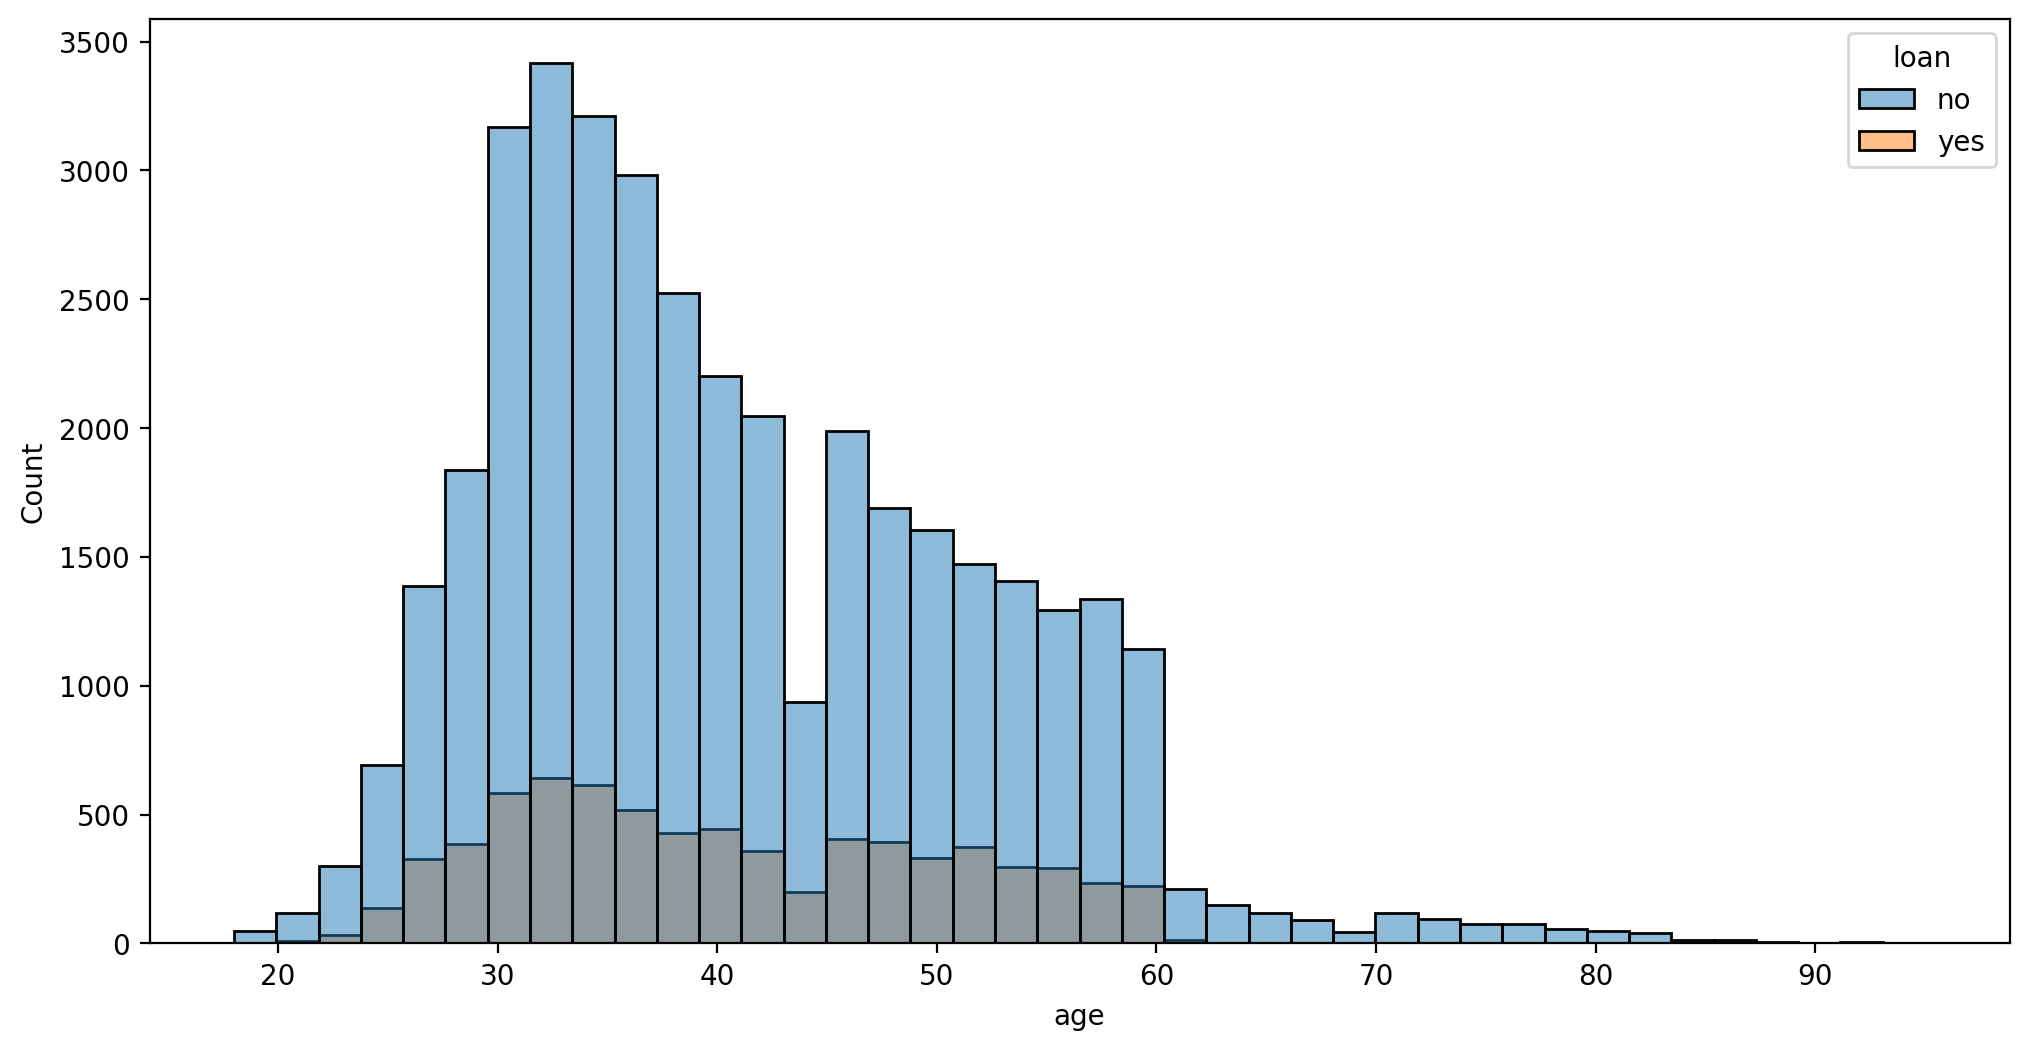

In [9]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df, x='age',bins=40, hue='loan')

<Axes: xlabel='pdays', ylabel='Count'>

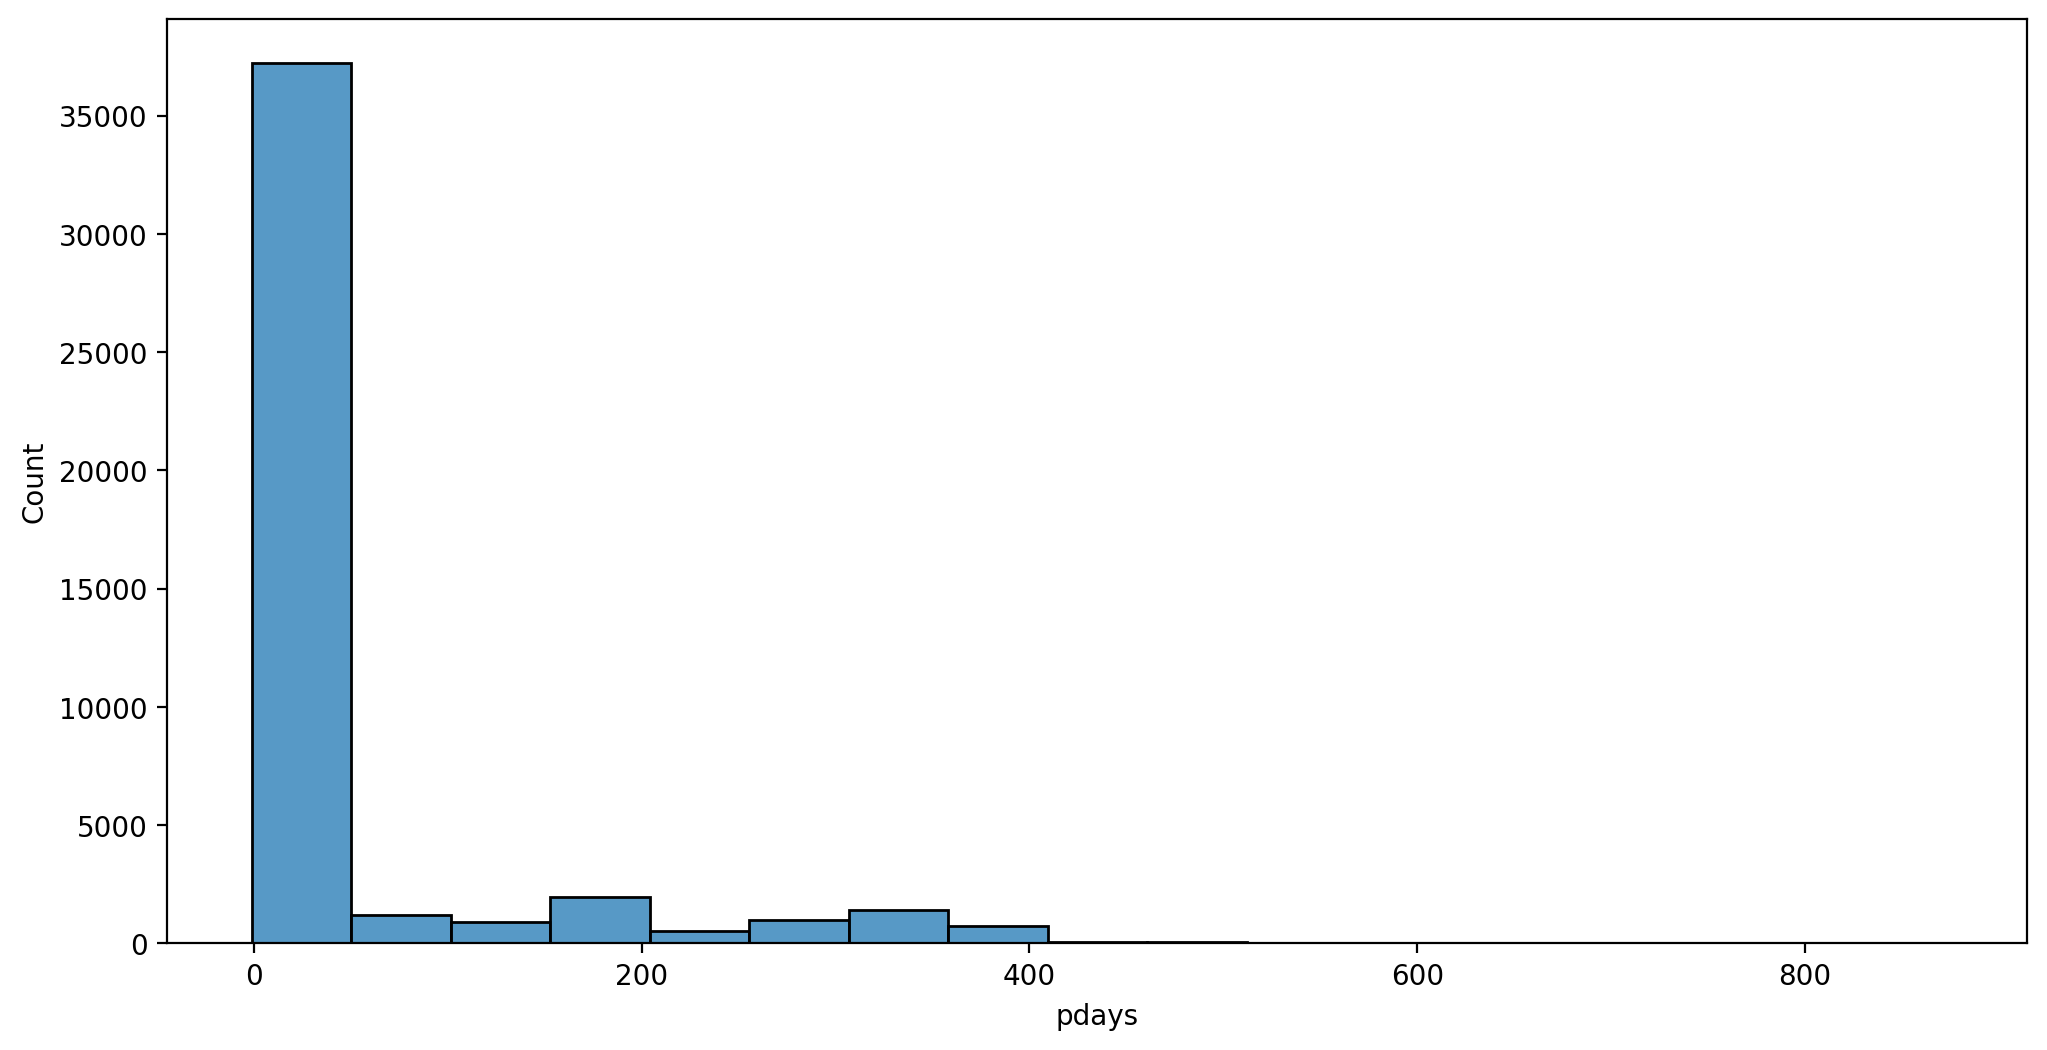

In [10]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df[df['pdays']!=999], x='pdays')

In [11]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [12]:
df['duration']

,duration
0,261
1,151
2,76
3,92
4,198
...,...
45206,977
45207,456
45208,1127
45209,508


(0.0, 1000.0)

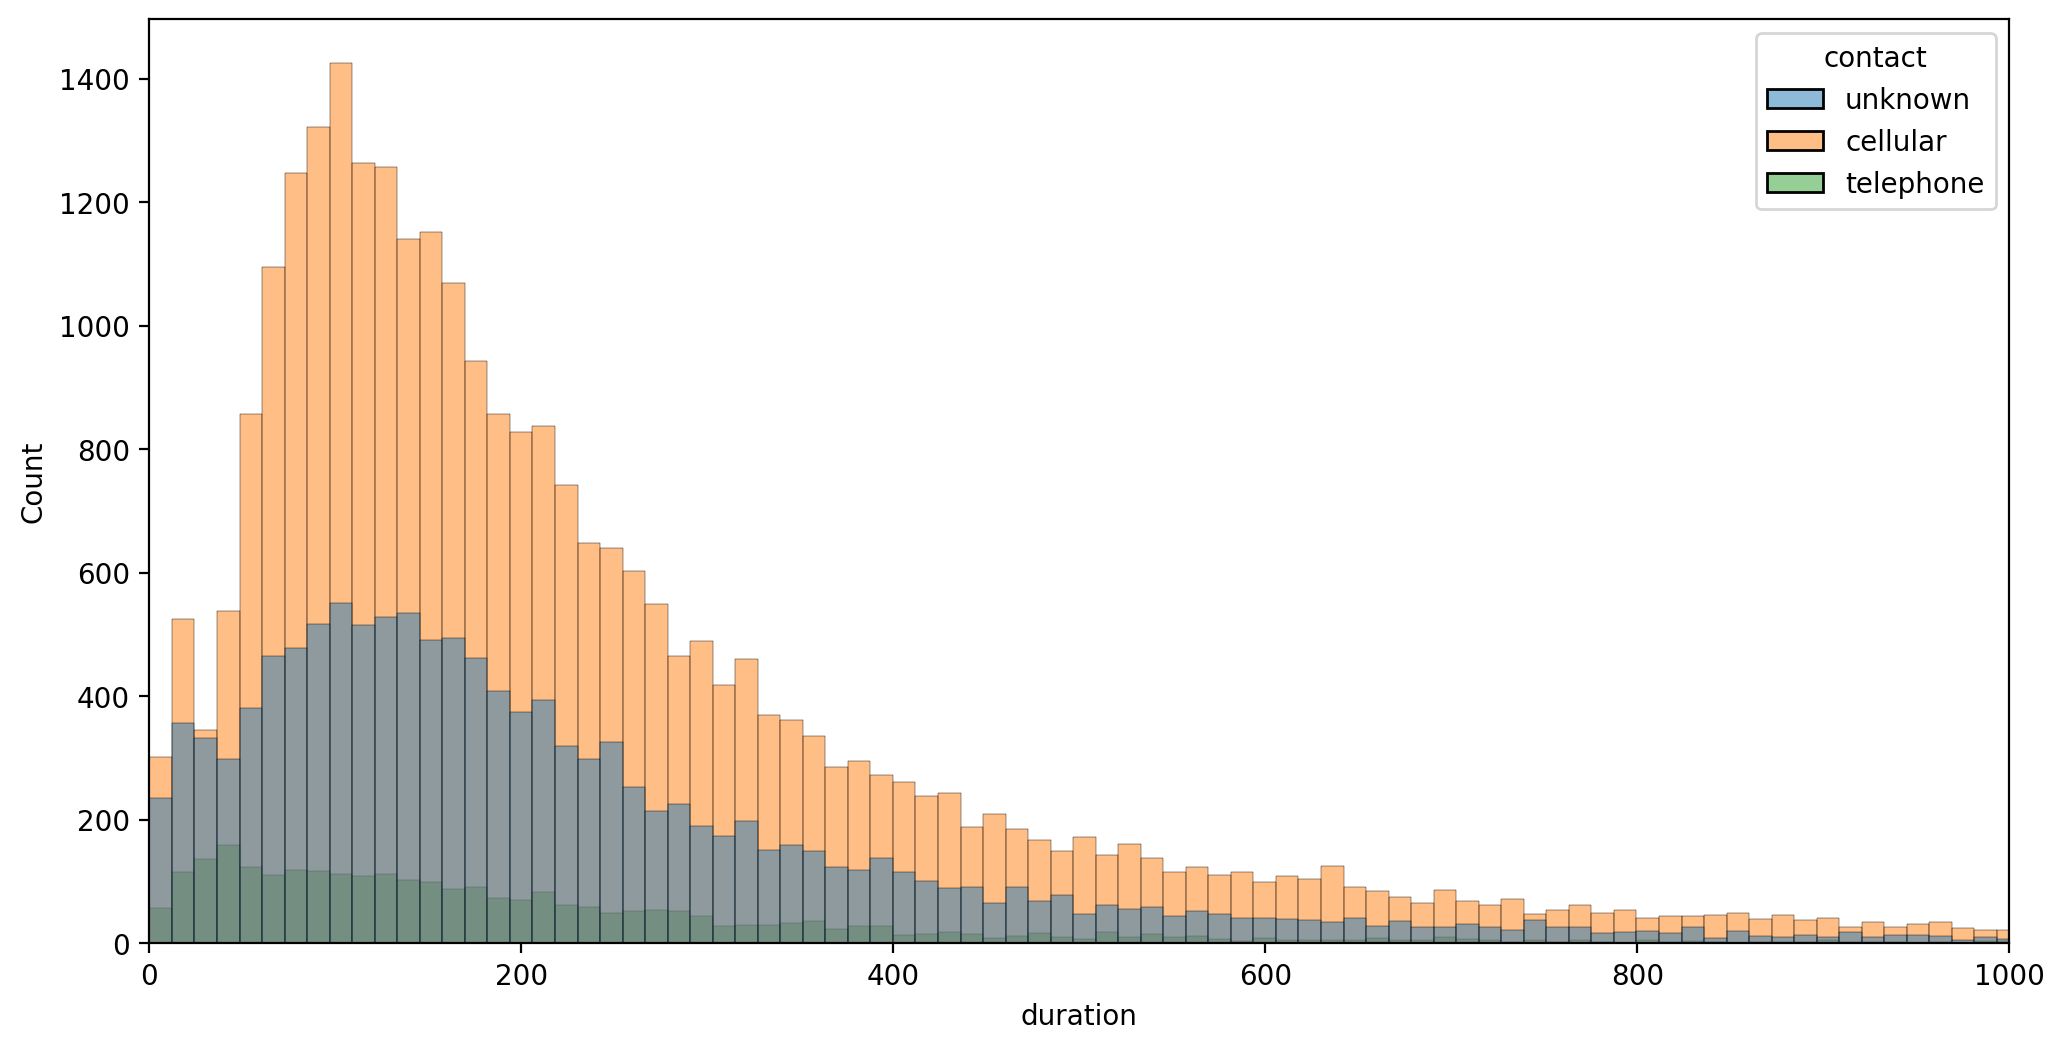

In [13]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='duration',hue='contact')
plt.xlim(0,1000)

<Axes: xlabel='contact', ylabel='count'>

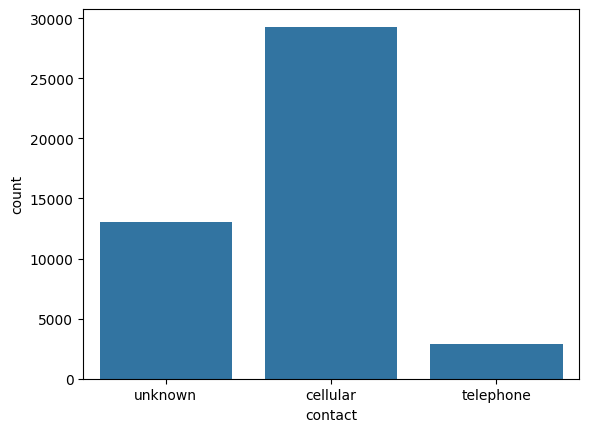

In [14]:
sns.countplot(data=df, x='contact')

In [15]:
df['job'].value_counts().index

Index(['blue-collar', 'management', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student', 'unknown'],
      dtype='object', name='job')

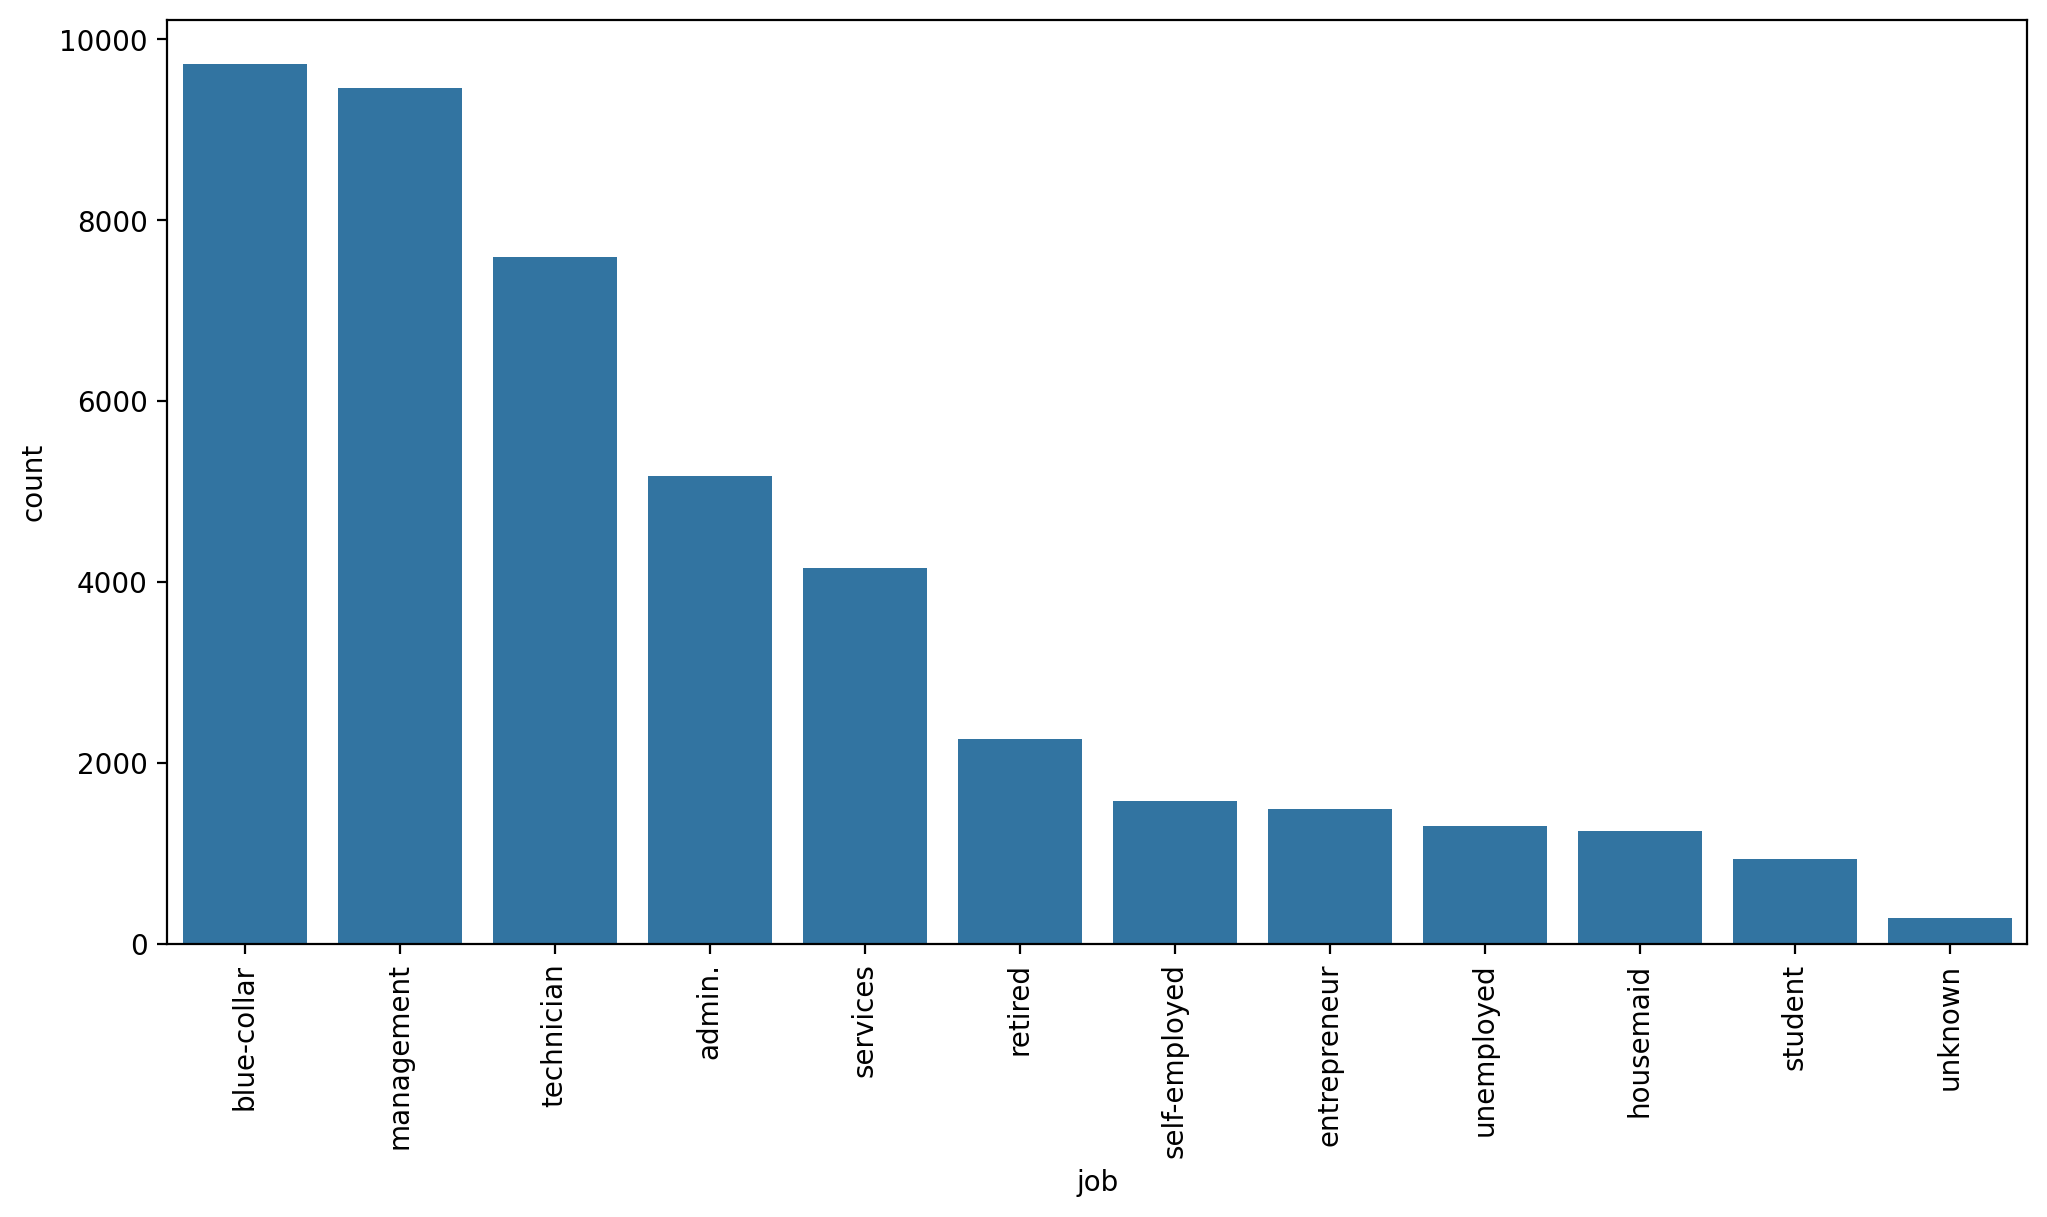

In [16]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df,x='job',order=df['job'].value_counts().index)
plt.xticks(rotation=90);

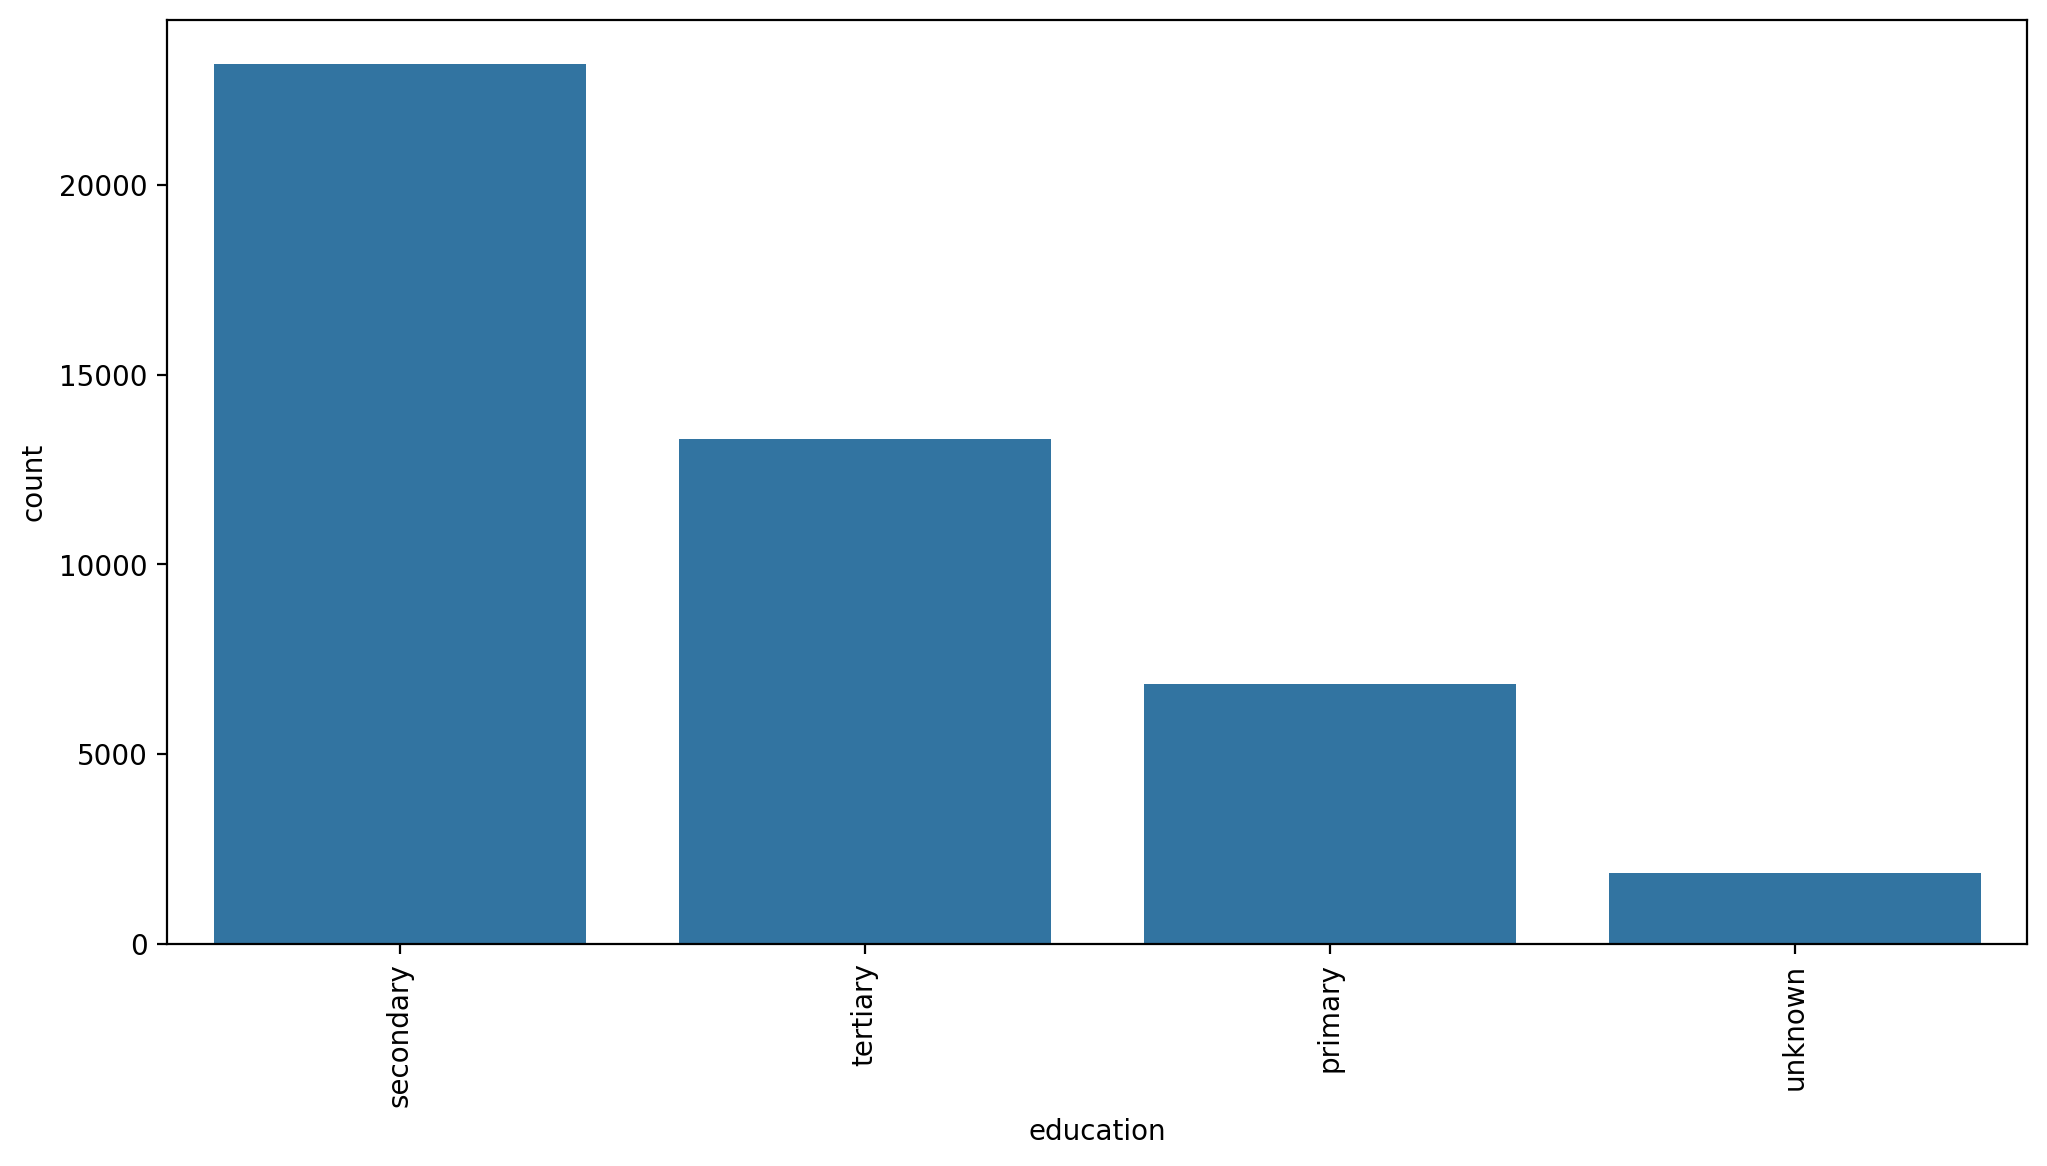

In [17]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df,x='education',order=df['education'].value_counts().index)
plt.xticks(rotation=90);

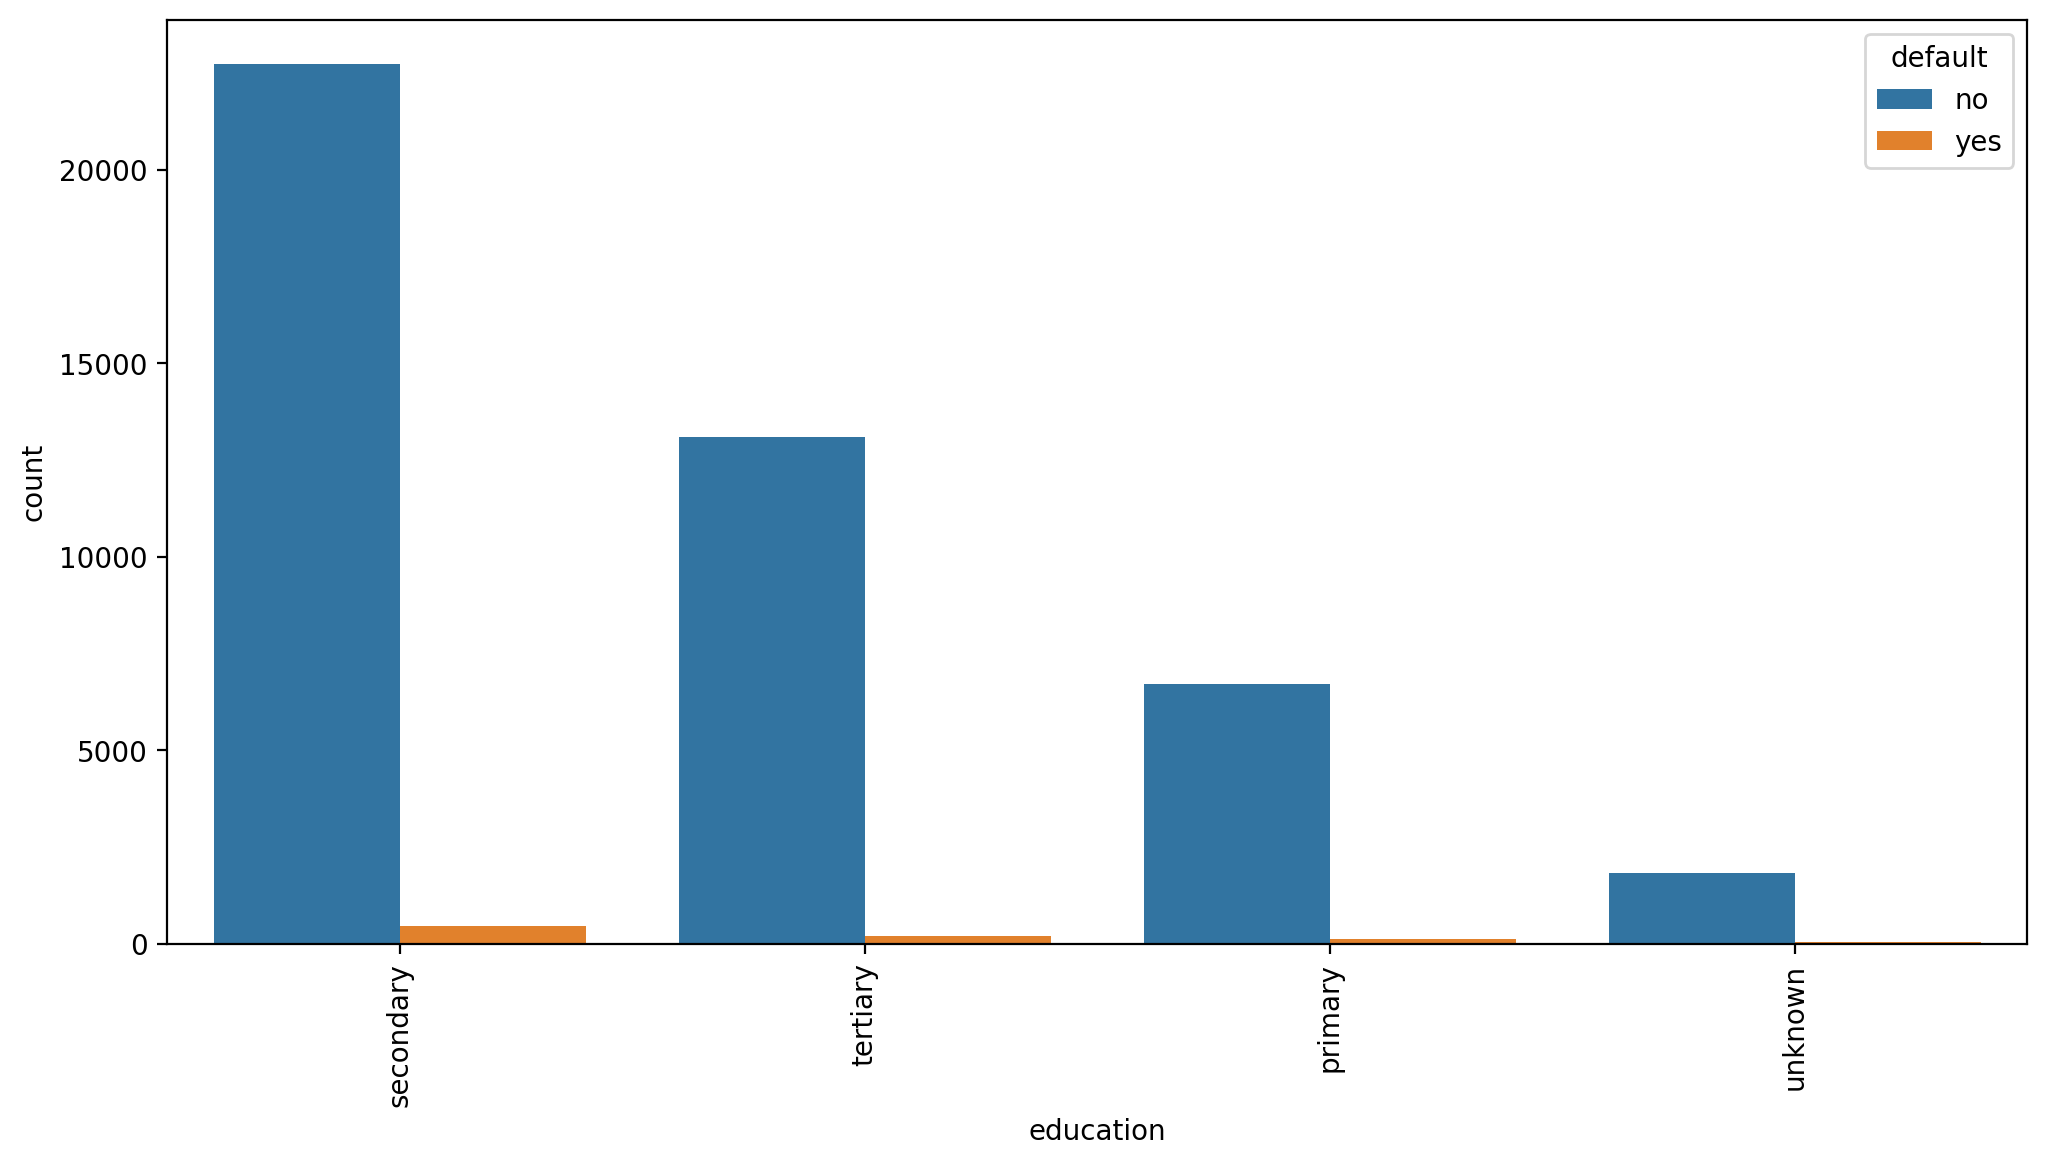

In [18]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df,x='education',order=df['education'].value_counts().index, hue='default')
plt.xticks(rotation=90);

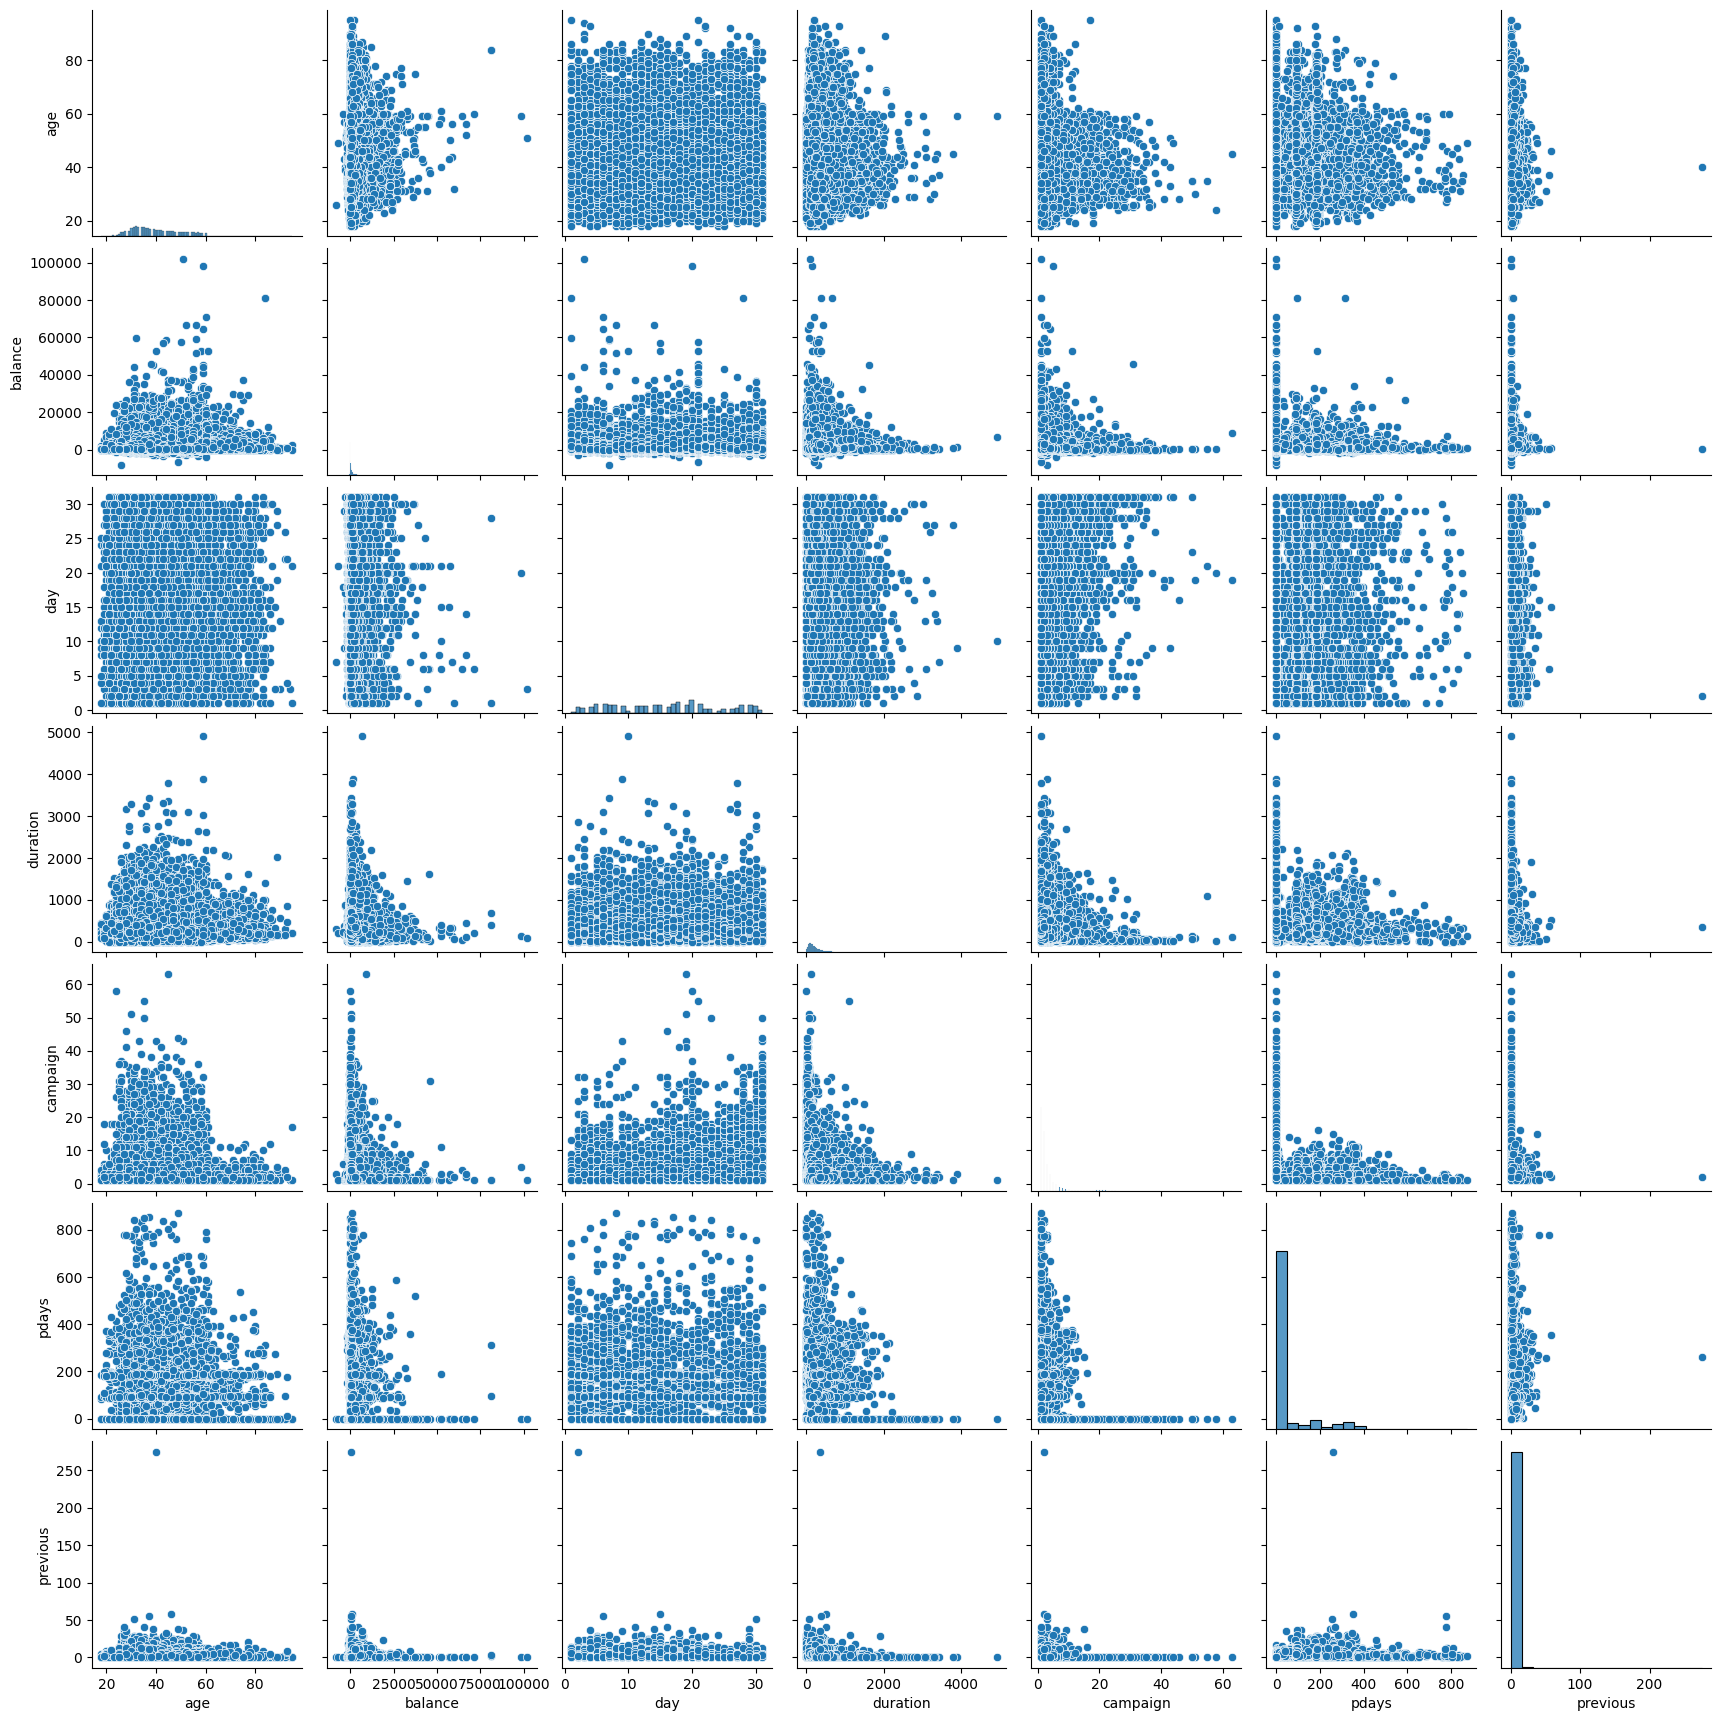

In [19]:
sns.pairplot(df)

In [20]:
X = pd.get_dummies(df)

In [21]:
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,Target_no,Target_yes
0,58,2143,5,261,1,-1,0,False,False,False,...,True,False,False,False,False,False,False,True,True,False
1,44,29,5,151,1,-1,0,False,False,False,...,True,False,False,False,False,False,False,True,True,False
2,33,2,5,76,1,-1,0,False,False,True,...,True,False,False,False,False,False,False,True,True,False
3,47,1506,5,92,1,-1,0,False,True,False,...,True,False,False,False,False,False,False,True,True,False
4,33,1,5,198,1,-1,0,False,False,False,...,True,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,False,False,False,...,False,True,False,False,False,False,False,True,False,True
45207,71,1729,17,456,2,-1,0,False,False,False,...,False,True,False,False,False,False,False,True,False,True
45208,72,5715,17,1127,5,184,3,False,False,False,...,False,True,False,False,False,False,True,False,False,True
45209,57,668,17,508,4,-1,0,False,True,False,...,False,True,False,False,False,False,False,True,True,False


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
scaled_X = scaler.fit_transform(X)

In [25]:
from sklearn.cluster import KMeans

In [26]:
model = KMeans(n_clusters=2)

In [27]:
cluster_labels = model.fit_predict(scaled_X)

In [28]:
X['Cluster'] = cluster_labels

In [29]:
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,Target_no,Target_yes,Cluster
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,False,False,False,False,True,True,False,0
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,False,False,False,False,True,True,False,0
2,33,2,5,76,1,-1,0,False,False,True,...,False,False,False,False,False,False,True,True,False,0
3,47,1506,5,92,1,-1,0,False,True,False,...,False,False,False,False,False,False,True,True,False,0
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,False,False,False,False,True,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,False,False,False,...,True,False,False,False,False,False,True,False,True,1
45207,71,1729,17,456,2,-1,0,False,False,False,...,True,False,False,False,False,False,True,False,True,1
45208,72,5715,17,1127,5,184,3,False,False,False,...,True,False,False,False,False,True,False,False,True,1
45209,57,668,17,508,4,-1,0,False,True,False,...,True,False,False,False,False,False,True,True,False,1


<Axes: >

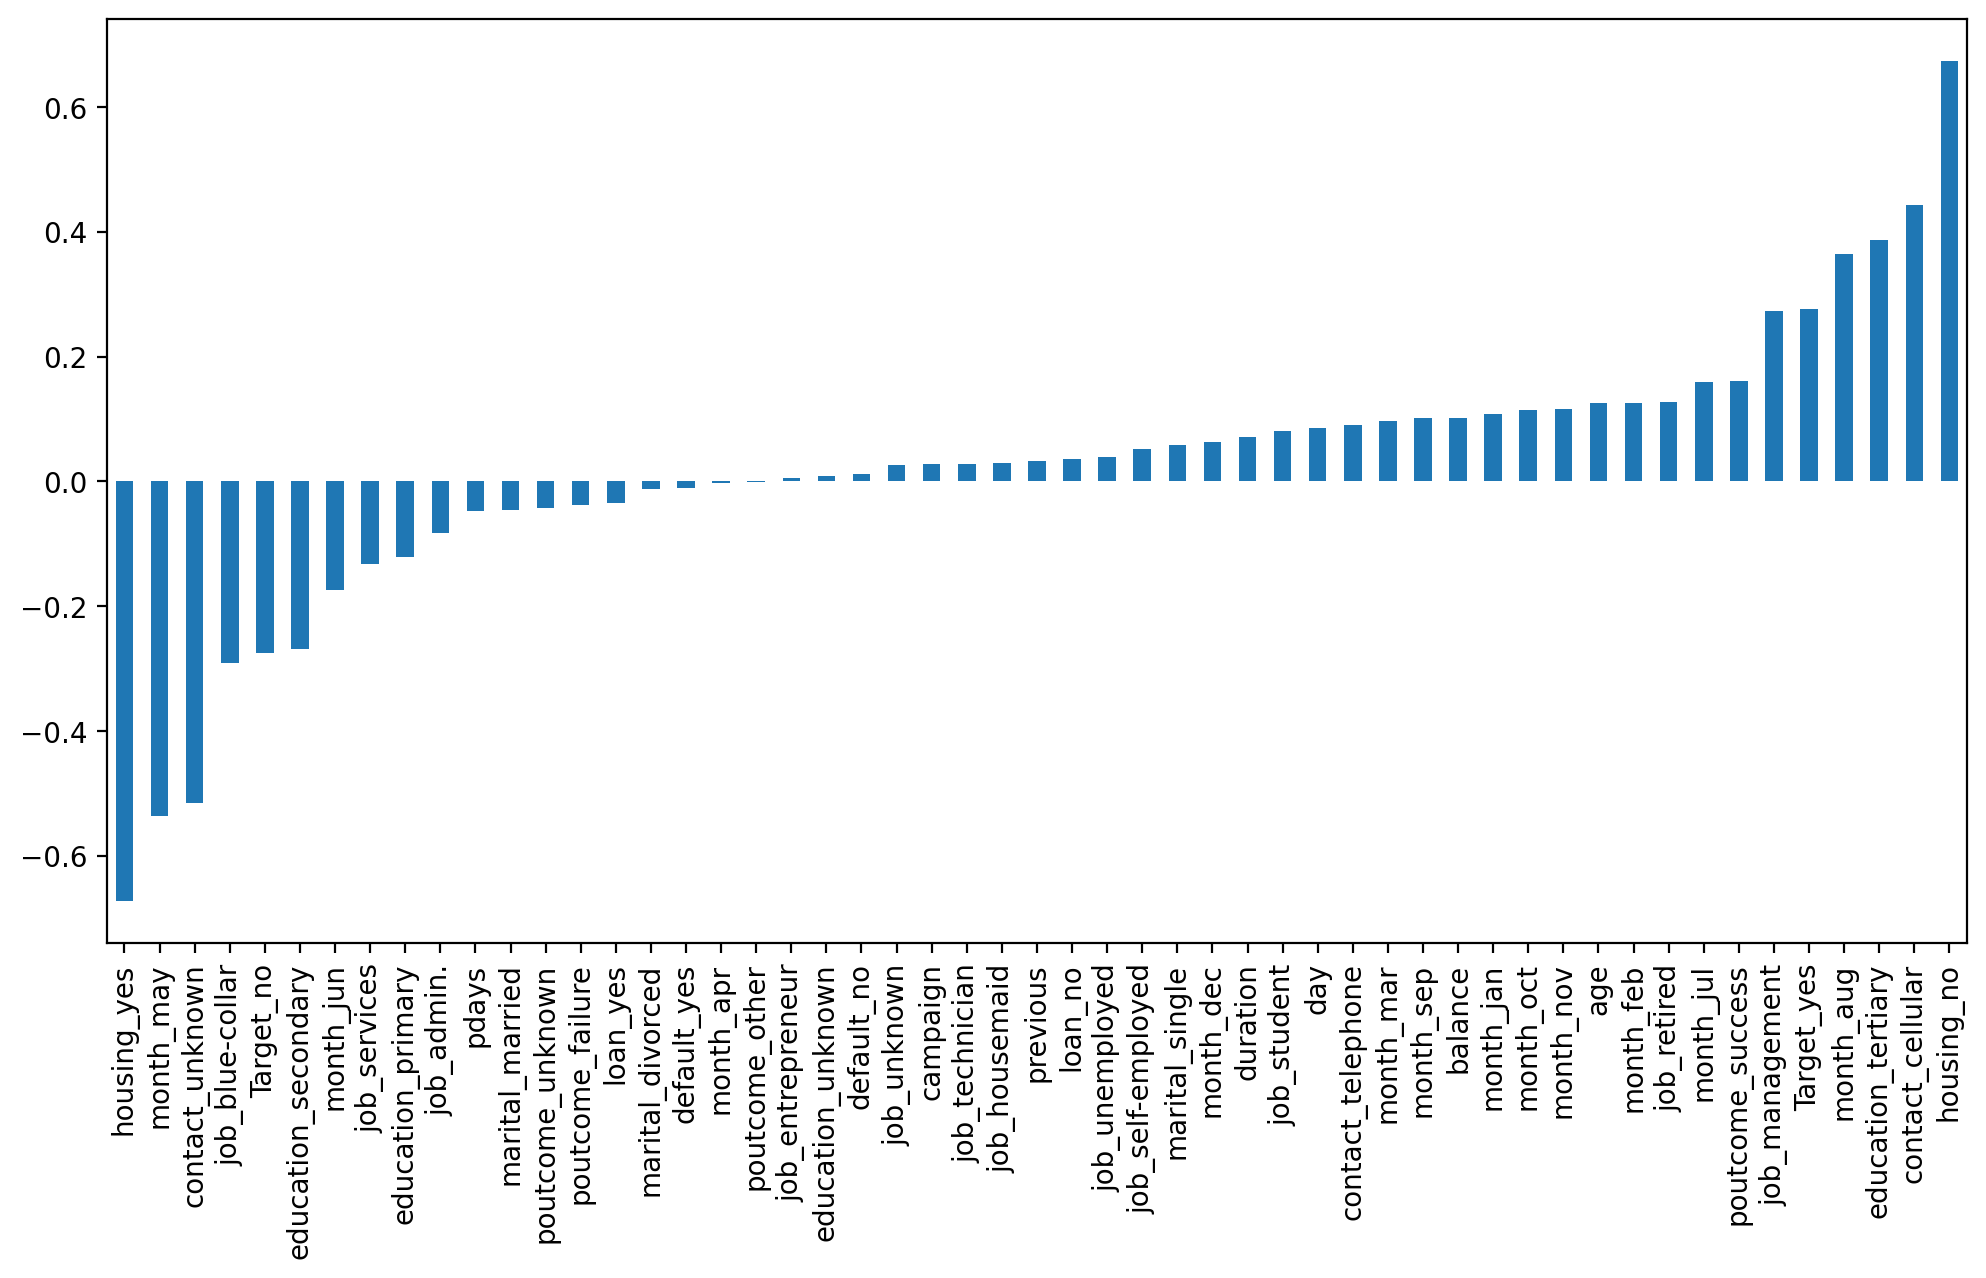

In [30]:
plt.figure(figsize=(12,6), dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

In [31]:
#choosing a K value

In [32]:
ssd = []

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)

    ssd.append(model.inertia_) #sum of square distances

In [33]:
ssd

[2266678.692873529,
 2247205.6693665185,
 2083599.750449295,
 2023525.8235259831,
 1979501.6787316562,
 1924584.4745268507,
 1894916.0311477575,
 1836149.7404264137]

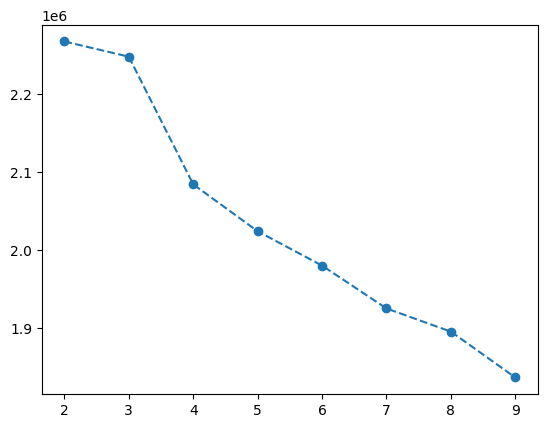

In [34]:
plt.plot(range(2,10),ssd,'o--')

In [35]:
pd.Series(ssd)

,0
0,2.266679e+06
1,2.247206e+06
2,2.083600e+06
3,2.023526e+06
4,1.979502e+06
5,1.924584e+06
6,1.894916e+06
7,1.836150e+06


In [36]:
pd.Series(ssd).diff() # 5 --> dip --> k=6

,0
0,NaN
1,-19473.023507
2,-163605.918917
3,-60073.926923
4,-44024.144794
5,-54917.204205
6,-29668.443379
7,-58766.290721


In [37]:
model2 = KMeans(n_clusters=6)

In [38]:
cluster_labels_2 = model2.fit_predict(scaled_X)

In [39]:
X['Cluster'] = cluster_labels_2

In [40]:
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,Target_no,Target_yes,Cluster
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,False,False,False,False,True,True,False,5
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,False,False,False,False,True,True,False,5
2,33,2,5,76,1,-1,0,False,False,True,...,False,False,False,False,False,False,True,True,False,1
3,47,1506,5,92,1,-1,0,False,True,False,...,False,False,False,False,False,False,True,True,False,5
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,False,False,False,False,True,True,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,False,False,False,...,True,False,False,False,False,False,True,False,True,4
45207,71,1729,17,456,2,-1,0,False,False,False,...,True,False,False,False,False,False,True,False,True,4
45208,72,5715,17,1127,5,184,3,False,False,False,...,True,False,False,False,False,True,False,False,True,4
45209,57,668,17,508,4,-1,0,False,True,False,...,True,False,False,False,False,False,True,True,False,3


In [45]:
model2.cluster_centers_[:10]

array([[-5.82491564e-02,  1.96379036e-02, -1.92725317e-01,
        -1.50418390e-01, -2.03229996e-01,  2.01024774e+00,
         1.15231852e+00,  7.45736277e-02,  4.97903012e-02,
        -1.83510059e-01, -5.43250436e-02,  6.10793081e-03,
        -3.80034062e-02, -1.28830189e-03,  1.87260670e-02,
         2.98933749e-02,  1.36027747e-02, -4.59324512e-02,
        -4.55930110e-02,  1.06994091e-02, -5.13467271e-02,
         4.82201093e-02, -5.09390001e-02,  6.65690005e-02,
        -1.75055431e-02, -3.54266828e-02,  7.24311666e-02,
        -7.24311666e-02, -3.37676978e-01,  3.37676978e-01,
         6.63454505e-03, -6.63454505e-03,  5.57079568e-01,
         4.97457937e-02, -6.14594188e-01,  3.44647946e-01,
        -2.75574167e-01,  6.03246728e-02,  2.58197390e-01,
         2.18338203e-01, -3.72147541e-01, -2.88525932e-01,
         1.35927552e-02,  1.07568434e-01,  2.26177957e-01,
         7.61753991e-02,  8.84268338e-02,  1.86472773e+00,
         1.04743503e+00,  1.69531676e-01, -2.11548053e+0

In [43]:
model2.labels_

array([5, 5, 1, ..., 4, 3, 1], dtype=int32)

<Axes: >

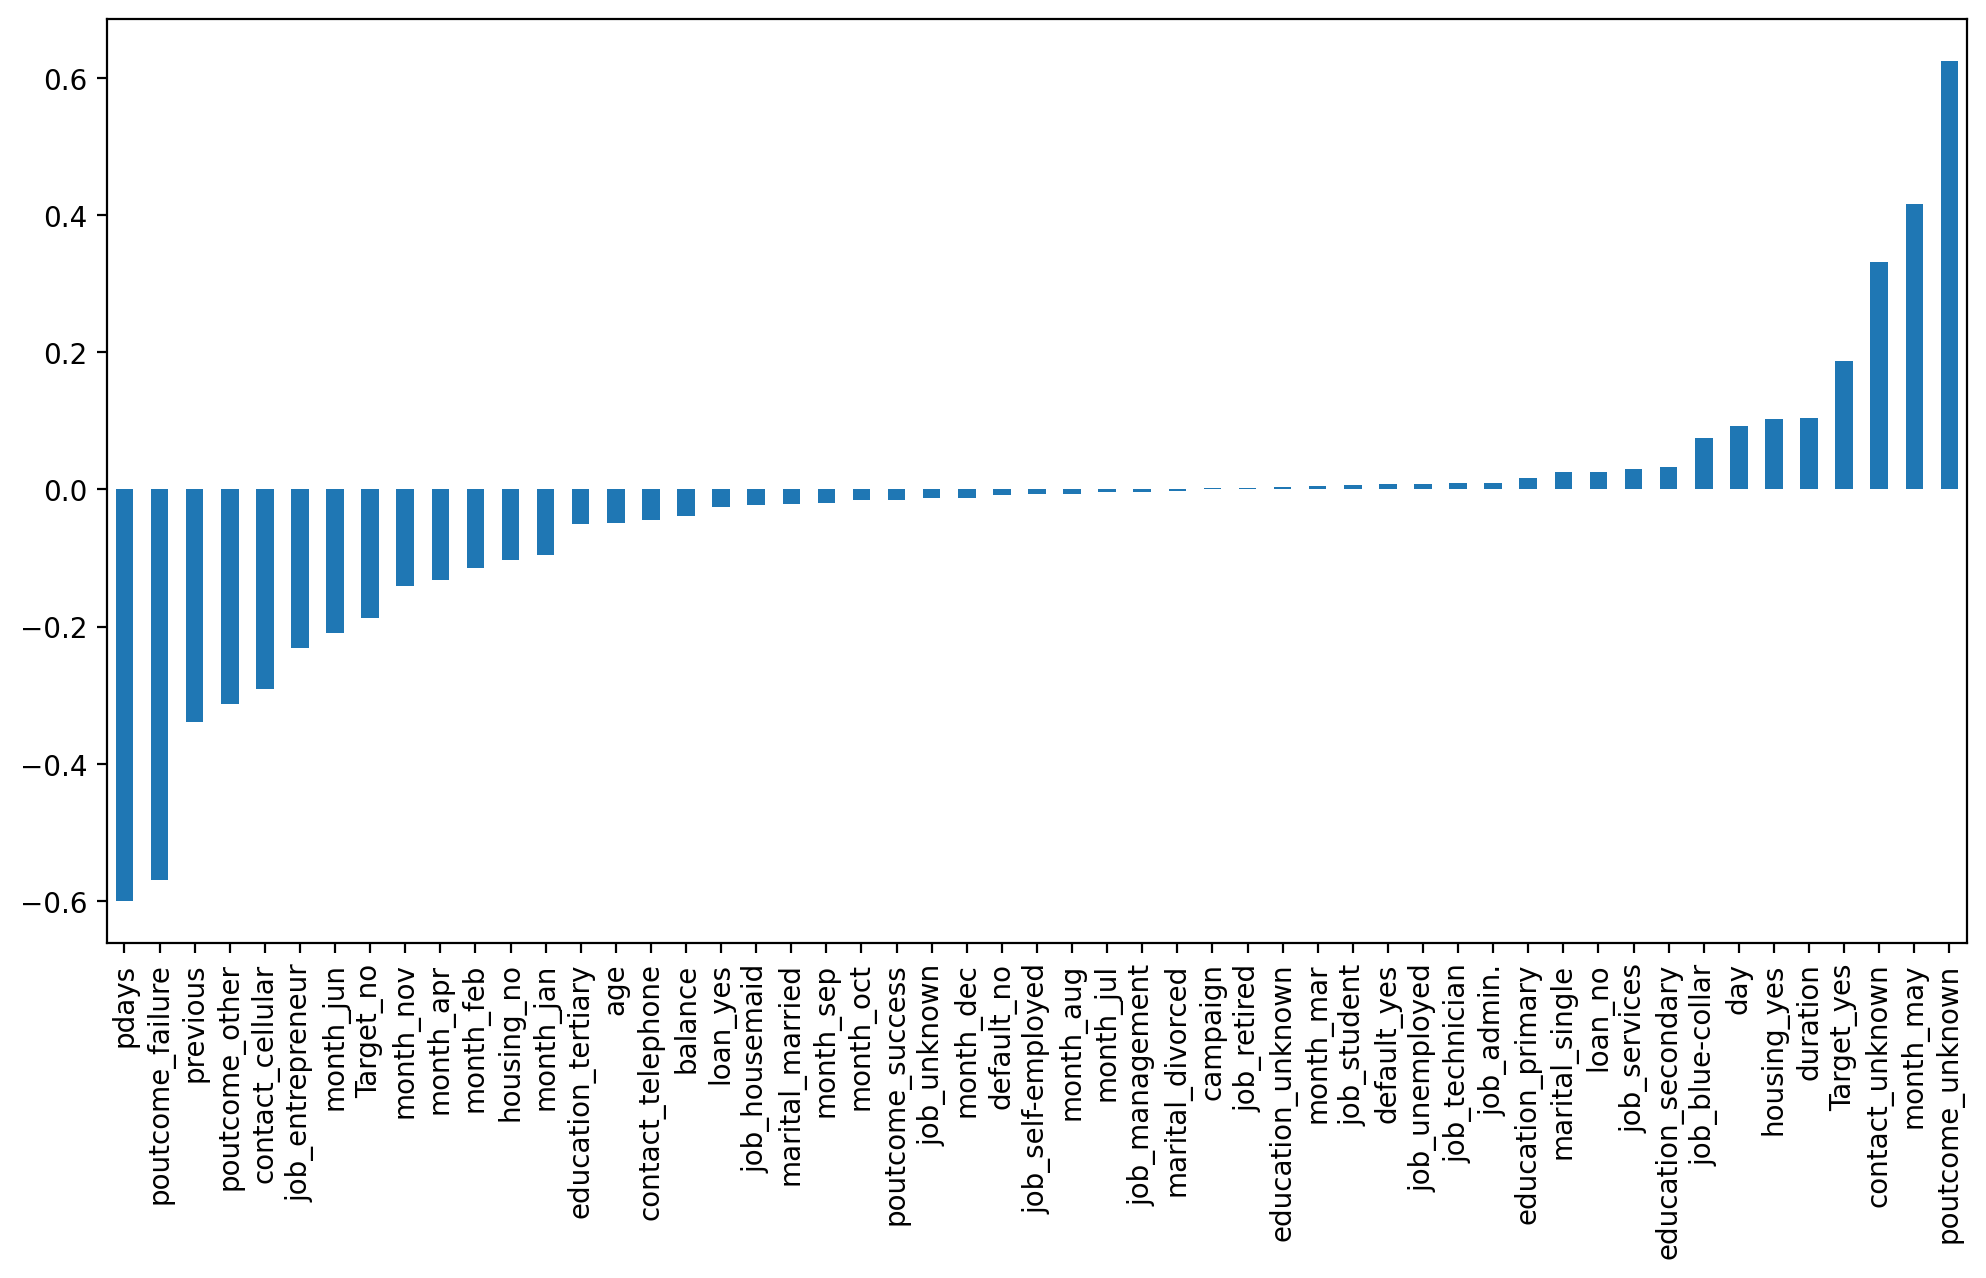

In [44]:
plt.figure(figsize=(12,6), dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')